# Exploring SVMs

* *Project:* M1: Mini Project
* *Author:* Jacob Buysse

In this project we are going to explore SVMs and compare them to other classification models using the Iris dataset.

In this notebook we will be using...

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC, LinearSVC
from sklearn.inspection import DecisionBoundaryDisplay

Let us load the Iris dataset and view the head/info/describe results.

In [2]:
iris = datasets.load_iris(as_frame=True)
df = iris.frame
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [4]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


So we have 150 records with four possible features and one target classification.  The features have the following ranges:
* *sepal length* - 4.3cm to 7.9cm (5.8cm +/- 0.8cm)
* *sepal width* - 2.0cm to 4.4cm (3.1cm +/- 0.4cm)
* *petal length* - 1.0cm to 6.9cm (3.8 +/- 1.8cm)
* *petal width* - 0.1cm to 2.5cm (1.2 +/- 0.8cm)

In [5]:
print(f"{df.target.value_counts()}")
print(f"{iris.target_names}")

target
0    50
1    50
2    50
Name: count, dtype: int64
['setosa' 'versicolor' 'virginica']


There appear to be three possible classifications with 50 samples each.
* 0 - setosa
* 1 - versicolor
* 2 - virginica

## Unscaled Petal Length/Width SVM

Let us use the unscaled petal length and width features to predict the target classification.
We will use a 75/25 train/test split of the samples stratified over the target classifications.

In [6]:
features = ["petal length (cm)", "petal width (cm)"]
X = df[features].values
y = df.target.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=777, stratify=df.target)
print(f"X_train {len(X_train)}, X_test {len(X_test)}, y_train {len(y_train)}, y_test {len(y_test)}")

X_train 112, X_test 38, y_train 112, y_test 38


That leaves us with 112 training samples and 38 testing samples.

Let us define a helper method for scoring model results.

In [7]:
def score_model(y_pred):
    print("Confusion Matrix")
    print(f"{confusion_matrix(y_test, y_pred)}")
    print(f"{classification_report(y_test, y_pred)}")

Let us use an SVM with all default parameters (kernel = rbf, C = 1)

In [8]:
model = SVC(random_state=777).fit(X_train, y_train)
score_model(model.predict(X_test))

Confusion Matrix
[[12  0  0]
 [ 0 12  1]
 [ 0  1 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.92      0.92      0.92        13
           2       0.92      0.92      0.92        13

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38



We had an overall F1-score of 95%.  We incorrectly labeled one versicolor and one virginica out of the 38 testing samples.

## Scaled Petal Length/Width SVMs

Now let us scale our features and try again with several different regularization parameters.

In [9]:
scaler = StandardScaler()
scaler.fit(X_train)
model = SVC(random_state=777).fit(scaler.transform(X_train), y_train)
score_model(model.predict(scaler.transform(X_test)))

Confusion Matrix
[[12  0  0]
 [ 0 11  2]
 [ 0  1 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.92      0.85      0.88        13
           2       0.86      0.92      0.89        13

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38



We did slightly worse by incorrectly labelling one more versicolor which dropped our overall F1-score down to 92%.

Let us try dropping the C regularization parameter down from 1 to 0.1.

In [10]:
model = SVC(C=0.1, random_state=777).fit(scaler.transform(X_train), y_train)
score_model(model.predict(scaler.transform(X_test)))

Confusion Matrix
[[12  0  0]
 [ 0 12  1]
 [ 0  1 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.92      0.92      0.92        13
           2       0.92      0.92      0.92        13

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38



This returned the overall F1-score back to 95%.

Let us try a poly kernel function instead of the rbf kernel.

In [11]:
model = SVC(kernel='poly', degree=3, random_state=777).fit(scaler.transform(X_train), y_train)
score_model(model.predict(scaler.transform(X_test)))

Confusion Matrix
[[12  0  0]
 [ 0 13  0]
 [ 0  1 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.93      1.00      0.96        13
           2       1.00      0.92      0.96        13

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



This did even better by getting all of the versicolor correct and only one virgnica incorrect, raising the overall F1-score to 97%.

Let us try a linear kernel function.

In [12]:
model = SVC(kernel='linear', random_state=777).fit(scaler.transform(X_train), y_train)
score_model(model.predict(scaler.transform(X_test)))

Confusion Matrix
[[12  0  0]
 [ 0 11  2]
 [ 0  1 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.92      0.85      0.88        13
           2       0.86      0.92      0.89        13

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38



That one performed similarly to the rbf kernel on the scaled data with an F1-score of 92%.

## Scaled Sepal Length/Width SVMs

Let us use the sepal length and width and see how SVMs perform on the scaled values.

In [13]:
features = ["sepal length (cm)", "sepal width (cm)"]
X = df[features].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=777, stratify=df.target)
scaler = StandardScaler()
scaler.fit(X_train);

In [14]:
model = SVC(random_state=777).fit(scaler.transform(X_train), y_train)
score_model(model.predict(scaler.transform(X_test)))

Confusion Matrix
[[12  0  0]
 [ 0 11  2]
 [ 0  3 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.79      0.85      0.81        13
           2       0.83      0.77      0.80        13

    accuracy                           0.87        38
   macro avg       0.87      0.87      0.87        38
weighted avg       0.87      0.87      0.87        38



Kernal rbf, C = 1, F1-score 87%.

In [15]:
model = SVC(C=0.1, random_state=777).fit(scaler.transform(X_train), y_train)
score_model(model.predict(scaler.transform(X_test)))

Confusion Matrix
[[12  0  0]
 [ 0 11  2]
 [ 0  4  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.73      0.85      0.79        13
           2       0.82      0.69      0.75        13

    accuracy                           0.84        38
   macro avg       0.85      0.85      0.85        38
weighted avg       0.85      0.84      0.84        38



Kernel rbf, C = 0.1, F1-score 85% (worse than C = 1).

In [16]:
model = SVC(kernel='poly', degree=3, random_state=777).fit(scaler.transform(X_train), y_train)
score_model(model.predict(scaler.transform(X_test)))

Confusion Matrix
[[12  0  0]
 [ 0 13  0]
 [ 0  9  4]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.59      1.00      0.74        13
           2       1.00      0.31      0.47        13

    accuracy                           0.76        38
   macro avg       0.86      0.77      0.74        38
weighted avg       0.86      0.76      0.73        38



Kernel poly, degree = 3, F1-score = 75% (worse).

In [17]:
model = SVC(kernel='linear', random_state=777).fit(scaler.transform(X_train), y_train)
score_model(model.predict(scaler.transform(X_test)))

Confusion Matrix
[[12  0  0]
 [ 0 11  2]
 [ 0  4  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.73      0.85      0.79        13
           2       0.82      0.69      0.75        13

    accuracy                           0.84        38
   macro avg       0.85      0.85      0.85        38
weighted avg       0.85      0.84      0.84        38



Kernel linear, F1-score = 85% (similar to rbf with C = 1).

## Visualize Decision Boundaries for different SVMs

Let us plot the different decision boundaries that were learned in the different SVM models (using unscaled petal features).

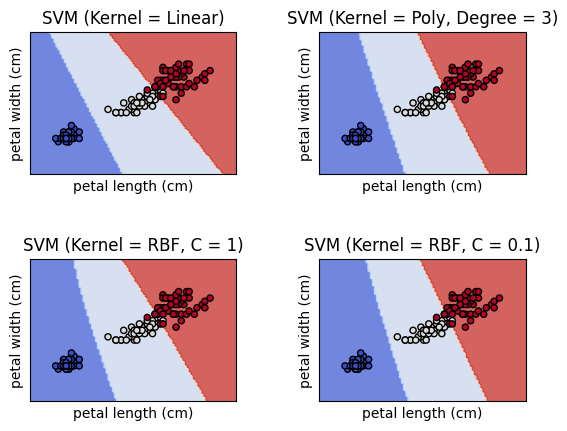

In [18]:
features = ["petal length (cm)", "petal width (cm)"]
X = df[features].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=777, stratify=df.target)
petal_length, petal_width = X[:, 0], X[:, 1]
titles = (
    "SVM (Kernel = Linear)",
    "SVM (Kernel = Poly, Degree = 3)",
    "SVM (Kernel = RBF, C = 1)",
    "SVM (Kernel = RBF, C = 0.1)"
)
models = (
    SVC(kernel='linear', random_state=777),
    SVC(kernel='poly', degree=3, random_state=777),
    SVC(random_state=777),
    SVC(C=0.1, random_state=777)
)
models = (model.fit(X_train, y_train) for model in models)
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.6)
for model, title, ax in zip(models, titles, sub.flatten()):
    display = DecisionBoundaryDisplay.from_estimator(
        model,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel=features[0],
        ylabel=features[1]
    )
    ax.scatter(petal_length, petal_width, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
plt.show()